# Model Prediksi Lokasi Eksplorasi Sumur OilyGiant Menggunakan Bootstrap dan Machine Learning <a id='intro'></a>

Sebuah perusahaan bernama `OilyGiant` ingin melakukan eksplorasi minyak untuk tiga wilayah. Kita diminta untuk menentukan lokasi mana yang cocok untuk dilakukan eksplorasi dengan memperhatikan aspek bisnis mereka agar tidak mengalami/mengurangi potensi kerugian dengan ambang batas risiko dibawah `2.5%` serta memperoleh laba yang tinggi. `OilyGiant` memiliki modal sebsar `100 Juta USD` dengan harga `per barel` minyak sebesar `4.5 USD`. 

Dataset yang berasal dari `OilyGiant` memiliki beberapa variabel yang mempengaruhi `kandungan minyak`. Kita akan membuat `model machine learning` yang mampu memprediksi lokasi dengan `kandungan minyak` paling tinggi. Kemudian dilanjutkan dengan analisis `keuntungan/margin profit` dan analisis `risiko` dengan teknik `bootstrapping`. Beberapa tujuan dan rumusan masalah untuk projek ini diantaranya: 
1. Kriteria seperti apa agar perusahaan `OilyGiant` tidak mengalami kerugian?
2. Bagaimana performa `model machine learning` terhadap dataset?
3. Wilayah mana yang cocok dijadikan lokasi `200 titik` explorasi sumur?
4. Seberapa besar rata-rata `profit margin` untuk lokasi yang terpilih menggunakan teknik `bootstrapping`?
5. Berapa `selang kepercercayaan` untuk lokasi tersebut dengan `tingkat keyakinan 95%`?

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Konten](#back)
* [Tahap 1. Pra-pemrosesan Data](#cont_1)
    * [1.1 Inisialisasi Library](#cont_2) 
    * [1.2 Memuat Dataset dan Menampilkan Informasi](#cont_3)
    * [1.3 Mengecek Nilai yang Hilang](#cont_4) 
    * [1.4 Mengecek Dupliasi Dataset](#cont_5) 
* [Tahap 2. Analisis Data Eksploratif (EDA)](#cont_6)
    * [2.1 Analisis Boxplot Kandungan Minyak](#cont_7) 
    * [2.2 Tabel Korelasi](#cont_8) 
* [Tahap 3. Machine Learning untuk Mendapatkan Lokasi Minyak Terbaik](#cont_9)
    * [3.1 Membagi Dataset](#cont_10) 
    * [3.2 Menghitung Metrik Machine Learning](#cont_11) 
    * [3.3 Variabel Penting Bisnis](#cont_12) 
    * [3.4 Estimasi Margin Profit](#cont_13) 
        * [3.4.1 Margin Profit Tanpa Teknik Bootstrap](#cont_14) 
        * [3.4.2 Margin Profit Menggunakan Teknik Bootstrap](#cont_15) 
    * [3.5 Selang Kepercayaan dan Risiko untuk Bootstrap Margin Profit](#cont_16) 
* [Tahap 4. Kesimpulan Umum](#cont_17)

# Pra-pemrosesan Data <a id='cont_1'></a>

Tahap pertama yang perlu dilakukan adalah mempersiapkan dataset mulai dari `memuat library` yang diperlukan, `memuat semua dataset kedalam projek`, `mengecek sampel data`, `mengecek nilai yang hilang` dan `mengecek duplikat`.

## Inisialisasi Library <a id='cont_2'></a>

Selanjutnya kita akan memuat library yang diperlukan. Disini kita membutuhkan beberapa library yaitu `pandas` untuk mengolah dataset, `numpy` untuk keperluan numerik, `seaborn` dan `matplotlib` untuk visualisasi data serta `scikit learn` untuk pemodelan `machine learning`. Mari kita muat library yang dibutuhkan.

In [1]:
# memuat library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# set tema seaborn
sns.set_theme(palette='bright')

## Memuat Dataset dan Menampilkan Informasi <a id='cont_3'></a>

Dataset terdiri dari tiga macam yang mewakilkan setiap wilayah yang memiliki potensi sumber minyak beserta parameter-parameter lainya.

In [2]:
# memuat dataset geo_1
try:
    geo_df1 = pd.read_csv('geo_data_0.csv')
except:
    geo_df1 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
# memuat informasi dataset
print(geo_df1.info())

# menampilkan sampel dataset
geo_df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
# memuat dataset geo_2
try:
    geo_df2 = pd.read_csv('geo_data_1.csv')
except:
    geo_df2 = pd.read_csv('/datasets/geo_data_1.csv')

In [5]:
# memuat informasi dataset
print(geo_df2.info())

# menampilkan sampel dataset
geo_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
# memuat dataset geo_3
try:
    geo_df3 = pd.read_csv('geo_data_2.csv')
except:
    geo_df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [7]:
# memuat informasi dataset
print(geo_df3.info())

# menampilkan sampel dataset
geo_df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Terapat `100000 baris` dan `4 kolom` disetiap dataset wilayah/region. Berikut ini penjelasan masing-masing kolom:
- Kolom `id` merupakan kode unik yang mewakili lokasi sumur minyak
- Kolom `f0, f1, f2` merupakan tiga fitur titik (makna spesifiknya tidak penting, tetapi fitur itu sendiri signifikan)
- Kolom `product` merupakan volume cadangan minyak di lokasi sumur dalam satuan ribuan barel.

## Mengecek Nilai yang Hilang <a id='cont_4'></a>

In [8]:
# mengecek nilai yang hilang geo_1
geo_df1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [9]:
# mengecek nilai yang hilang geo_2
geo_df2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
# mengecek nilai yang hilang geo_3
geo_df3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Disini kita tidak memiliki satupun `nilai yang hilang` disetiap dataset.

## Mengecek Dupliasi Dataset <a id='cont_5'></a>

In [11]:
# mengecek duplikat dataset
print('Dataset Region-1 -->',geo_df1.duplicated().sum(),'duplikat')
print('Dataset Region-2 -->',geo_df2.duplicated().sum(),'duplikat')
print('Dataset Region-3 -->',geo_df3.duplicated().sum(),'duplikat')

Dataset Region-1 --> 0 duplikat
Dataset Region-2 --> 0 duplikat
Dataset Region-3 --> 0 duplikat


Disini kita tidak memiliki satupun `dupliasi data` disetiap dataset.

# Analisis Data Eksploratif (EDA) <a id='cont_6'></a>

Selanjutnya kita akan mengeksploarasi data seperti membuat `boxplot` untuk melihat kandungan `minyak` disetiap wilayah serta membuat `tabel korelasi`. 

## Analisis Boxplot Kandungan Minyak <a id='cont_7'></a>

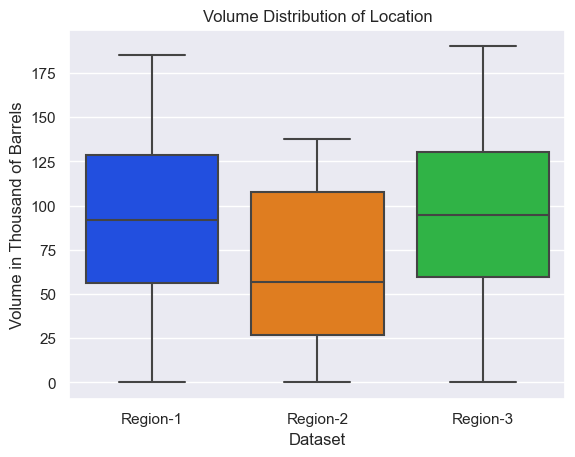

In [12]:
# menggabungkan kolom `product` dari masing-masing dataset
product = pd.concat([geo_df1['product'],geo_df2['product'],geo_df3['product']],axis=1)
product.columns = ['Region-1','Region-2','Region-3']

# membuat boxplot
sns.boxplot(product)
plt.title('Volume Distribution of Location')
plt.ylabel('Volume in Thousand of Barrels')
plt.xlabel('Dataset')

# menampilkan boxplot
plt.show()

Bisa kita lihat sekilas bahwa `Region-3` nampak memiliki kandungan yang paling banyak dibandingkan wilayah lainya. Sedangkan yang paling rendah kandungan minyak berada di `Region-2`.

## Tabel Korelasi <a id='cont_8'></a>

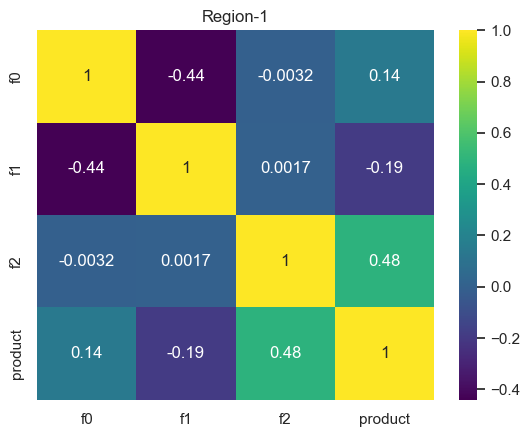

In [13]:
# membuat tabel korelasi antar variabel pada dataset `geo_1`
corr_tab1 = geo_df1.select_dtypes(exclude='object').corr()
sns.heatmap(corr_tab1,annot=True,cmap='viridis').set_title('Region-1')
plt.show()

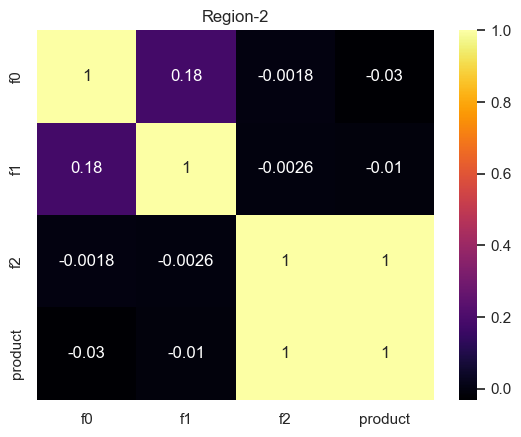

In [14]:
# membuat tabel korelasi antar variabel pada dataset `geo_2`
corr_tab2 = geo_df2.select_dtypes(exclude='object').corr()
sns.heatmap(corr_tab2,annot=True,cmap='inferno').set_title('Region-2')
plt.show()

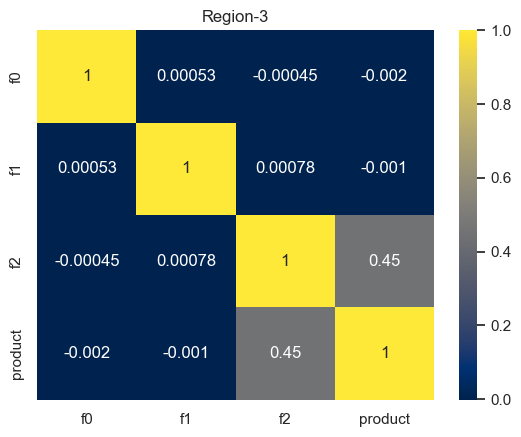

In [15]:
# membuat tabel korelasi antar variabel pada dataset `geo_3`
corr_tab3 = geo_df3.select_dtypes(exclude='object').corr()
sns.heatmap(corr_tab3,annot=True,cmap='cividis').set_title('Region-3')
plt.show()

Bisa terlihat bahwa kandungan minyak `product` memiliki korelasi yang cukup kuat terhadap variabel `f2` sedangkan lemah terhadap variabel lain `f0` dan `f1`.

# Machine Learning untuk Mendapatkan Lokasi Minyak Terbaik <a id='cont_9'></a>

## Membagi Dataset <a id='cont_10'></a>

Disini kita akan membagi dataset menjadi `fitur` dan `target` serta membagi persentase dataset menjadi `75% training` dan `25% validasi`.

In [16]:
# memisahkan dataset menjadi fitur dan target untuk dataset geo_1
features_geo1 = geo_df1.drop(['product','id'],axis=1)
target_geo1 = geo_df1['product']

# memisahkan dataset menjadi fitur dan target untuk dataset geo_2
features_geo2 = geo_df2.drop(['product','id'],axis=1)
target_geo2 = geo_df2['product']

# memisahkan dataset menjadi fitur dan target untuk dataset geo_3
features_geo3 = geo_df3.drop(['product','id'],axis=1)
target_geo3 = geo_df3['product']

In [17]:
# membagi dataset menjadi 75% training dan 25% valid untuk dataset geo_1
features_train_geo1, features_valid_geo1, target_train_geo1, target_valid_geo1 = train_test_split(features_geo1, target_geo1, test_size=0.25, random_state=12345)

# membagi dataset menjadi 75% training dan 25% valid untuk dataset geo_2
features_train_geo2, features_valid_geo2, target_train_geo2, target_valid_geo2 = train_test_split(features_geo2, target_geo2, test_size=0.25, random_state=12345)

# membagi dataset menjadi 75% training dan 25% valid untuk dataset geo_3
features_train_geo3, features_valid_geo3, target_train_geo3, target_valid_geo3 = train_test_split(features_geo3, target_geo3, test_size=0.25, random_state=12345)

## Menghitung Metrik Machine Learning <a id='cont_11'></a>

Selanjutnya kita lihat performa dari `model machine learning` menggunakan `root mean square error (RMSE)`. Model yang kita buat adalah `regresi linier` dari `scikit-learn`.

In [18]:
# membuat fungsi untuk menghitung rata-rata prediksi volume minyak beserta RMSE model
def oil_pred(feature_train,feature_valid,target_train,target_valid):
    # membuat model regresi linier
    model = LinearRegression()
    # melatih model menggunakan dataset training
    model.fit(feature_train,target_train)
    # memprediksi rata-rata volume minyak
    vol = model.predict(feature_valid)
    # menghitung RMSE
    rmse = mean_squared_error(target_valid,vol)**0.5
    # mengembalikan nilai volume minyak dan nilai RMSE
    return vol, rmse

In [19]:
# menghitung estimasi prediksi rata-rata volume minyak dan nilai RMSEnya untuk dataset geo_1
vol_1, rmse_1 = oil_pred(features_train_geo1, features_valid_geo1, target_train_geo1, target_valid_geo1)
print('Rata-rata volume minyak -->', round(vol_1.mean(),2),'ribu barel')
print('RMSE -->', round(rmse_1,2),'ribu barel')

Rata-rata volume minyak --> 92.59 ribu barel
RMSE --> 37.58 ribu barel


In [20]:
# menghitung estimasi prediksi rata-rata volume minyak dan nilai RMSEnya untuk dataset geo_2
vol_2, rmse_2 = oil_pred(features_train_geo2, features_valid_geo2, target_train_geo2, target_valid_geo2)
print('Rata-rata volume minyak -->', round(vol_2.mean(),2),'ribu barel')
print('RMSE -->', round(rmse_2,2),'ribu barel')

Rata-rata volume minyak --> 68.73 ribu barel
RMSE --> 0.89 ribu barel


In [21]:
# menghitung estimasi prediksi rata-rata volume minyak dan nilai RMSEnya untuk dataset geo_3
vol_3, rmse_3 = oil_pred(features_train_geo3, features_valid_geo3, target_train_geo3, target_valid_geo3)
print('Rata-rata volume minyak -->', round(vol_3.mean(),2),'ribu barel')
print('RMSE -->', round(rmse_3,2),'ribu barel')

Rata-rata volume minyak --> 94.97 ribu barel
RMSE --> 40.03 ribu barel


Bisa terlihat dari ketiga wilayah, `model` memberikan skor terbaik pada wilayah `Region-2` yang memiliki `RMSE` sebesar `0.89 ribu barel`. Sedangkan Rata-rata volume minyak terbanyak berada di wilayah `Region-3` sebanyak `94.97 ribu barel`.

## Variabel Penting Bisnis <a id='cont_12'></a>

Berikut ini merupakan variabel penting dalam bisnis `OilyGiant` yaitu `modal investasi`, `jumlah target lokasi titik`, `harga minyak per barel`. Kita akan memperjelasnya kedalam beberapa poin:
- Berapa produksi dalam ribuan barel tiap sumur (titik) agar tidak mengalami kerugian?
- Membandingkan revenue tanpa kerugian dan revenue dari masing-masing wilayah.

In [22]:
# beberapa rangkuman data bisnis

# jumlah lokasi point terbaik
n_best = 200

# modal investasi (USD)
invest = 100000000

# harga per barel (USD/barel)
price_vol = 4.5

# harga per unit produk (USD/1000barel)
price_prod = 4.5*1000

# mengetahui berapa unit produk yang bisa dihasilkan dari modal investasi untuk 200 lokasi
n_prod = invest/(price_prod*n_best)

print('Besarnya Unit Produk Tanpa Rugi',round(n_prod,2),'ribu barel')

Besarnya Unit Produk Tanpa Rugi 111.11 ribu barel


In [23]:
# menampilkan kembali perhitungan sebelumnya
print('Besarnya Unit Produk Region-1',round(vol_1.mean(),2),'ribu barel')
print('Besarnya Unit Produk Region-2',round(vol_2.mean(),2),'ribu barel')
print('Besarnya Unit Produk Region-3',round(vol_3.mean(),2),'ribu barel')

Besarnya Unit Produk Region-1 92.59 ribu barel
Besarnya Unit Produk Region-2 68.73 ribu barel
Besarnya Unit Produk Region-3 94.97 ribu barel


Dari perhitungan jelas bahwa jika kita ingin tidak rugi maka `unit produk` yang harus dihasilkan `200 titik` masing-masing sebanyak `111.11 ribu barel`. Faktanya rata-rata ketiga wilayah menghasilkan `unit produk` dibawah `unit produk tanpa rugi` yang menghasilkan kerugian. 

## Estimasi Margin Profit <a id='cont_13'></a>

Berdasarkan perhitungan diatas nampaknya tidak masuk akal kalau kita menggunakan nilai rata-rata tersebut pada semua wilayah karena menghasilkan kerugian. Disini kita akan mengestimasikanya dengan menggunakan beberapa teknik diantaranya:

### Margin Profit Tanpa Teknik Bootstrap <a id='cont_14'></a>

Disini kita hanya mengambil `200 lokasi` yang memiliki kandungan minyak paling banyak berdasarkan hasil prediksi model. Kemudian menghitung `Margin Profit` yang dihasilkan dari `200 lokasi` terhadap `modal investasi (revenue tanpa kerugian)`.

In [24]:
# membuat fungsi untuk menghitung margin profit antara prediksi model dan revenue tanpa kerugian
# data dari prediksi model(predict) dan data target validasi(target) untuk n_best=200
def margin_profit(predict,target):
    # membuat series untuk data dari prediksi
    pred = pd.Series(predict)
    # mereset index pada data target agar sesuai dengan index prediksi
    tar = target.reset_index(drop=True)
    # mengurutkan data prediksi dari yang terbesar
    pred.sort_values(ascending=False,inplace=True)
    # mengeluarkan nilai target berdasarkan index prediksi yang sudah diurutkan
    tar = tar[pred.index]
    # menghitung selisih revenue antara model prediksi dan revenue tanpa kerugian
    # margin = [jumlah revenue prediksi] - [jumlah revenue tanpa kerugian]
    # mengambil data terbaik sebanyak `n_best=200`
    margin = price_prod*(tar[:n_best].sum() - n_prod*n_best)

    # mengembalikan margin profit
    return margin

In [25]:
# menghitung margin profit menggunakan 200 titik terbaik untuk tiap dataset
rev_geo1 = margin_profit(vol_1,target_valid_geo1)
rev_geo2 = margin_profit(vol_2,target_valid_geo2)
rev_geo3 = margin_profit(vol_3,target_valid_geo3)

# menampilkan revenue 200 titik lokasi terbaik
print('Margin Profit [Region-1] -->',round(rev_geo1,2),'USD')
print('Margin Profit [Region-2] -->',round(rev_geo2,2),'USD')
print('Margin Profit [Region-3] -->',round(rev_geo3,2),'USD')

Margin Profit [Region-1] --> 33208260.43 USD
Margin Profit [Region-2] --> 24150866.97 USD
Margin Profit [Region-3] --> 27103499.64 USD


Ternyata ketika kita mengambil `200 lokasi` terbaik dari dataset kita `tidak mengalami kerugian`, bahkan `menunjukan keuntungan (nilai positif margin)`. Berbeda dengan perhitungan sebelumnya ketika menggunakan rata-rata `unit produk`.

### Margin Profit Menggunakan Teknik Bootstrap <a id='cont_15'></a>

Pembahasanya sudah bagus bahwa kita tidak mengalami `kerugian` bahkan meningkat. Namun kita apakah bisa memprediksi `resiko kerugian` dengan menggunakan fungsi sebelumnya? kita tidak tahu apakah mungkin terjadi kerugian atau tidak, kecuali dengan teknik `bootstrapping` seperti berikut untuk melihat distribusi `margin profit` untuk masing-masing wilayah. Kita akan membuat `1000 sampel bootsrap` dengan pengambilan sebanyak `500 sampel` untuk menentukan `200 lokasi`.

In [26]:
# jumlah sampel bootstrap
n_boot = 1000

# jumlah sampel point
n_point = 500

# membuat fungsi untuk menghitung margin profit menggunakan teknik bootstrap
def margin_bootsrap(predict,target):
    # tempat penampungan nilai margin untuk sampel bootstrap ke-i
    margin = []
    # mengubah data dari predict menjadi series
    predict = pd.Series(predict)
    # mereset index pada data target
    target = target.reset_index(drop=True)
    # membuat randomstate dari numpy
    random = np.random.RandomState(12345)

    # membuat bootstrap untuk sebanyak `n_boot=1000` untuk menghitung revenue
    for i in range(n_boot):
        # mengambil sampel sebanyak `n_point=500` dari data target
        tar_sample = target.sample(n_point,replace=True,random_state=random)
        # mengambil nilai prediksi yang sesuai dengan indeks target sampel
        predict_sample = predict[tar_sample.index]
        # mereset indeks taget sampel
        tar_sample.reset_index(drop=True,inplace=True)
        # mereset indeks prediksi sampel
        predict_sample.reset_index(drop=True,inplace=True)
        # menghitung besarnya margin profit dan menambahkanya ke tempat penampungan `margin`
        margin.append(margin_profit(predict_sample,tar_sample))

    # mengembalikan nilai margin
    return margin

In [27]:
# menghitung profit margin menggunakan teknik bootstrap untuk tiap dataset
rev_geo1_boot = margin_bootsrap(vol_1,target_valid_geo1)
rev_geo2_boot = margin_bootsrap(vol_2,target_valid_geo2)
rev_geo3_boot = margin_bootsrap(vol_3,target_valid_geo3)

# menampilkan rata-rata margin profit menggunakan bootstrap
print('Rata-rata Profit Margin [Region-1] -->',round(np.mean(rev_geo1_boot),2),'USD')
print('Rata-rata Profit Margin [Region-2] -->',round(np.mean(rev_geo2_boot),2),'USD')
print('Rata-rata Profit Margin [Region-3] -->',round(np.mean(rev_geo3_boot),2),'USD')

Rata-rata Profit Margin [Region-1] --> 3961649.85 USD
Rata-rata Profit Margin [Region-2] --> 4560451.06 USD
Rata-rata Profit Margin [Region-3] --> 4044038.67 USD


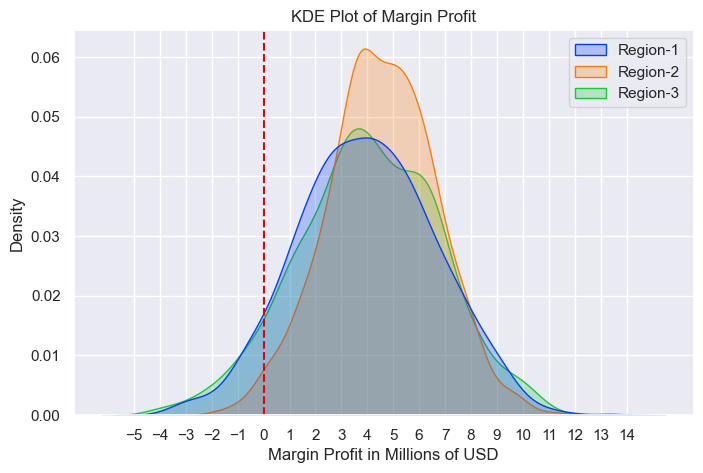

In [28]:
# menggabungkan hasil perhitungan bootstrapping
geo1 = pd.Series(rev_geo1_boot,name='Region-1')/1000000 # agar menjadi juta USD
geo2 = pd.Series(rev_geo2_boot,name='Region-2')/1000000 # agar menjadi juta USD
geo3 = pd.Series(rev_geo3_boot,name='Region-3')/1000000 # agar menjadi juta USD
combine = pd.concat([geo1,geo2,geo3],axis=1)

# membuat kde plot untuk data gabungan
plt.figure(figsize=(8,5))
sns.kdeplot(combine,fill=True)
plt.xlabel('Margin Profit in Millions of USD')
plt.title('KDE Plot of Margin Profit')
plt.xticks(np.arange(-5,15,1))
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

Bedasarkan grafik diatas terlihat bahwa semua dataset kita memberikan probabilitas `margin profit` yang `positif` lebih banyak dibandingkan dengan `margin profit` yang `negatif` yang ditandai dengan perbatasan `garis merah`. Luas area disebelah kanan `garis merah` jauh lebih besar dari pada disebelah kiri. Dari ketiga wilayah, `Region-2` yang memberikan rata-rata `margin profit` yang paling tinggi sebanyak `4.5 juta USD`.

## Selang Kepercayaan dan Risiko untuk Bootstrap Margin Profit <a id='cont_16'></a>

Penting untuk mengetahui risiko dari masing-masing wilayah, kita akan memilih wilayah yang memiliki `risiko` paling rendah dengan ambang batas di bawah `2.5%` dan memilih `rata-rata margin profit paling tinggi`. Kita akan mencari `selang kepercayaan` berdasarkan `tingkat keyakinan` sebesar `95%`.

In [29]:
# selang kepercayaan 95%
cfd_interval = 0.95

# ambang batas kerugian 2.5%
risk_threshold = 0.25

In [30]:
# membuat fungsi untuk menghitung risiko dan selang kepercayaan
def cfd_risk(dif_rev,sample):
    # membuat selang kepercayaan
    low = round((1 - cfd_interval)/2,3) # menghitung quantil bawah
    # menghitung quantile atas
    high = cfd_interval + low
    # menghitung quantil bawah untuk margin profit
    low_cfd = dif_rev.quantile(low)*1000000 # mengembalikan harga ke USD
    # menghitung quantil atas untuk margin profit
    hight_cfd = dif_rev.quantile(high)*1000000 # mengembalikan harga ke USD

    # mengitung risiko negatif dari margin profit
    negative = [neg for neg in dif_rev if neg < 0] # menghitung count negatif
    # menghitung persentase risiko negatif
    risk = len(negative)/sample*100
    
    # mengembalikan nilai
    return low_cfd, hight_cfd, risk

In [31]:
# menghitung selang kepercayaan dan risiko
low, high, risk = cfd_risk(geo1,n_boot)
print('Wilayah Region-1')
print('Rata-rata Margin Profit',round(np.mean(rev_geo1_boot),2),'USD')
print(f'Confidence Interval (95% Keyakinan) dari',round(low,2),'USD','hingga',round(high,2),'USD')
print('Persentase Risiko Negatif Revenue',risk,'%')

Wilayah Region-1
Rata-rata Margin Profit 3961649.85 USD
Confidence Interval (95% Keyakinan) dari -1112155.46 USD hingga 9097669.42 USD
Persentase Risiko Negatif Revenue 6.9 %


In [32]:
# menghitung selang kepercayaan dan risiko
low, high, risk = cfd_risk(geo2,n_boot)
print('Wilayah Region-2')
print('Rata-rata Margin Profit',round(np.mean(rev_geo2_boot),2),'USD')
print(f'Confidence Interval (95% Keyakinan) dari',round(low,2),'USD','hingga',round(high,2),'USD')
print('Persentase Risiko Negatif Revenue',risk,'%')

Wilayah Region-2
Rata-rata Margin Profit 4560451.06 USD
Confidence Interval (95% Keyakinan) dari 338205.09 USD hingga 8522894.54 USD
Persentase Risiko Negatif Revenue 1.5 %


In [33]:
# menghitung selang kepercayaan dan risiko
low, high, risk = cfd_risk(geo3,n_boot)
print('Wilayah Region-3')
print('Rata-rata Margin Profit',round(np.mean(rev_geo3_boot),2),'USD')
print(f'Confidence Interval (95% Keyakinan) dari',round(low,2),'USD','hingga',round(high,2),'USD')
print('Persentase Risiko Negatif Revenue',risk,'%')

Wilayah Region-3
Rata-rata Margin Profit 4044038.67 USD
Confidence Interval (95% Keyakinan) dari -1633504.13 USD hingga 9503595.75 USD
Persentase Risiko Negatif Revenue 7.6 %


Berdasarkan analisis risiko menunjukan bahwa hanya wilayah `Region-2` yang memenuhi kriteria dibawah `risiko 2.5%` dan memiliki `rata-rata margin profit` paling tinggi berkisar `4.65 juta USD` dengan `95% Keyakinan` berada pada `338205.09 USD` hingga `8522894.54 USD`.

# Kesimpulan Umum <a id='cont_17'></a>

Berikut ini yang bisa disimpulkan dari projek model prediksi lokasi ekplorasi sumur minyak `OilyGiant` diantaranya:
- Berdasarkan `analisis boxplot`, wilayah `Region-3` memiliki rata-rata kandungan minyak paling tinggi dibandingkan wilayah lain.
- Tabel korelasi menunjukan hanya variabel/fitur `f2` yang memiliki korelasi cukup baik dengan target `product` dibandingkan dengan variabel/fitur lain.
- Analisis dasar bisnis menunjukan jika kita tidak mengalami kerugian dengan modal investasi `100 juta USD` untuk `200 titik`, maka semua titik harus memproduksi sebanyak `111.11 ribu barel`. Jika kita menggunakan rata-rata `kandungan minyak` untuk tiap wilayah, maka kita akan merugi.
- Ketika kita mengambil `200 lokasi` dengan kandungan minyak terbanyak maka akan diperoleh keuntungan.
- Bootstrapping digunakan untuk melihat persebaran `margin profit` dan risiko (`margin profit negatif`) diperoleh `risiko Region-1` sebesar `6.9%`, `risiko Region-2` sebesar `1.5%` dan `risiko Region-3` sebesar `7.6%`.
- Wilayah `Region-2` yang memenuhi kriteria dibawah `risiko 2.5%` dan memiliki `rata-rata margin profit` paling tinggi berkisar `4.65 juta USD` dengan `95% Keyakinan` berada pada `338205.09 USD` hingga `8522894.54 USD`.